Importe dos packages necessários para a análise

In [48]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib inline

A página web escolhida, é uma página da wikipédia sobre a corrida de 24 horas de Le Mans. 

O site possui diversas tabelas, mas a única a ser analisada neste ficheiro é a tabela dos vencedores

In [49]:
website_url = 'https://pt.wikipedia.org/wiki/24_Horas_de_Le_Mans'
table_class = 'wikitable sortable'
response = requests.get(website_url)
print(response.status_code)

200


In [50]:
soup = BeautifulSoup(response.text, 'html.parser')
win_table = soup.find('table', {'class': table_class})
win_table

<table class="wikitable sortable" style="font-size: 100%;">
<tbody><tr>
<th>Ano</th>
<th>Pilotos</th>
<th>Equipe</th>
<th>Carro</th>
<th>Pneus</th>
<th>Voltas</th>
<th>Distância
</th></tr>
<tr>
<th><a href="/wiki/24_Horas_de_Le_Mans_de_2023" title="24 Horas de Le Mans de 2023">2023</a>
</th>
<td><span class="mw-image-border" typeof="mw:File"><a href="/wiki/Reino_Unido" title="Reino Unido"><img alt="Reino Unido" class="mw-file-element" data-file-height="600" data-file-width="1000" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/Flag_of_the_United_Kingdom_%283-5%29.svg/22px-Flag_of_the_United_Kingdom_%283-5%29.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/Flag_of_the_United_Kingdom_%283-5%29.svg/33px-Flag_of_the_United_Kingdom_%283-5%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/83/Flag_of_the_United_Kingdom_%283-5%29.svg/44px-Flag_of_the_United_Kingdom_%283-5%29.svg.png 2x" width="22"/></a></span> <a href="

In [51]:
df = pd.read_html(str(win_table))
df = pd.DataFrame(df[0])


No código em baixo, dei drop das linhas que não me trazem informação para a analise dos dados da tabela

In [52]:
df = df.dropna()
drop_linhas = ["Não disputada devido à Segunda Guerra Mundial e reconstrução Europeia", "Corrida cancelada devido a greves dos trabalhadores"]
df = df[~df['Distância'].isin(drop_linhas)]
df.head()

,Ano,Pilotos,Equipe,Carro,Pneus,Voltas,Distância
0,2023,James Calado Antonio Giovinazzi Alessandro P...,Ferrari–AF Corse,Ferrari 499P,M,342,4660.1 km
1,2022,Sébastien Buemi Brendon Hartley Ryo Hirakawa,Toyota Gazoo Racing,Toyota GR010 Hybrid,M,380,5177.17 km
2,2021,Mike Conway José María López Kamui Kobayashi,Toyota Gazoo Racing,Toyota GR010 Hybrid,M,371,5054.5 km
3,2020,Sébastien Buemi Kazuki Nakajima Brendon Hartley,Toyota Gazoo Racing,Toyota TS050 Hybrid,M,387,5273.262 km
4,2019,Sébastien Buemi Kazuki Nakajima Fernando Alonso,Toyota Gazoo Racing,Toyota TS050 Hybrid,M,385,5246.01 km


Correção da coluna 'Pilotos', pois os nomes dos pilotos não se encontravam separados

In [61]:
df['Pilotos'] = df['Pilotos'].str.replace(r'\s{2,}', ', ')

df.head()

C:\Users\nmate\AppData\Local\Temp\ipykernel_22000\3560860083.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Pilotos'] = df['Pilotos'].str.replace(r'\s{2,}', ', ')


,Ano,Pilotos,Equipe,Carro,Pneus,Voltas,Distância
0,2023,"James Calado, Antonio Giovinazzi, Alessandro P...",Ferrari–AF Corse,Ferrari 499P,M,342,4660.100
1,2022,"Sébastien Buemi, Brendon Hartley, Ryo Hirakawa",Toyota Gazoo Racing,Toyota GR010 Hybrid,M,380,5177.170
2,2021,"Mike Conway, José María López, Kamui Kobayashi",Toyota Gazoo Racing,Toyota GR010 Hybrid,M,371,5054.500
3,2020,"Sébastien Buemi Kazuki Nakajima, Brendon Hartley",Toyota Gazoo Racing,Toyota TS050 Hybrid,M,387,5273.262
4,2019,"Sébastien Buemi Kazuki Nakajima, Fernando Alonso",Toyota Gazoo Racing,Toyota TS050 Hybrid,M,385,5246.010


Descobrir qual foi a distância mínima, média e máxima em km

In [53]:
df['Distância'] = df['Distância'].replace(r'[^\d\.]+', '', regex=True)
df['Distância'] = pd.to_numeric(df['Distância'], errors='coerce')

distancia_minima = df['Distância'].min()
distancia_media = df['Distância'].mean()
distancia_maxima = df['Distância'].max()

print('Distância mínima: ', distancia_minima)
print('Distância média: ', distancia_media)
print('Distância máxima: ', distancia_maxima)

Distância mínima:  2077.341
Distância média:  4412.944846153847
Distância máxima:  5410.71


In [54]:
#Distância mínima e máxima
df[(df['Distância'] == distancia_minima) | (df['Distância'] == distancia_maxima)]

,Ano,Pilotos,Equipe,Carro,Pneus,Voltas,Distância
13,2010,Mike Rockenfeller Timo Bernhard Romain Dumas,Audi Sport North America,Audi R15 TDI plus,M,397,5410.710
91,1924,John Duff Frank Clement,Duff & Aldington,Bentley 3 Litre Sport,D,120,2077.341


Descobrir as voltas mínimas, em média e máxima

In [55]:
df['Voltas'] = pd.to_numeric(df['Voltas'], errors='coerce')

menos_voltas = df['Voltas'].min()
media_voltas = df['Voltas'].mean()
mais_voltas = df['Voltas'].max()

print('Menos voltas: ', menos_voltas)
print('Média de voltas: ', media_voltas)
print('Mais voltas: ', mais_voltas)

Menos voltas:  120
Média de voltas:  321.3956043956044
Mais voltas:  397


Utilização de cada marca de pneus

In [56]:
contagem_pneus = df['Pneus'].value_counts()
contagem_pneus

D    34
M    32
G    14
E     5
F     3
A     1
P     1
C     1
Name: Pneus, dtype: int64

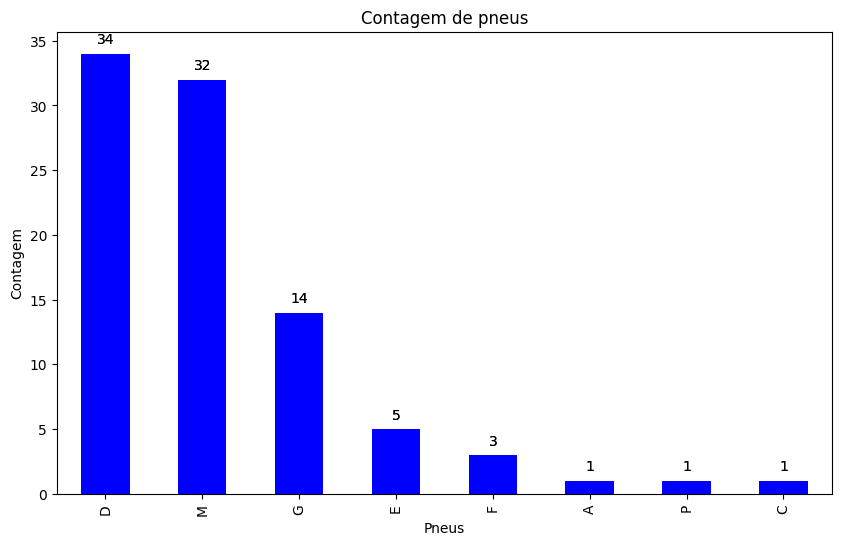

In [33]:
contagem_pneus.plot(kind='bar', figsize=(10, 6), color='blue')

ax = contagem_pneus.plot(kind='bar', figsize=(10, 6), color='blue')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Contagem de pneus')
plt.xlabel('Pneus')
plt.ylabel('Contagem')
plt.show()

Quantidade de vezes que cada carro ganhou

In [ ]:
contagem_carros = df['Carro'].value_counts()
contagem_carros

Audi R8                            5
Porsche 956                        4
Alfa Romeo 8C 2300                 4
Porsche 919 Hybrid                 3
Audi R18 e-tron quattro            3
                                  ..
Matra MS670C                       1
Matra MS670B                       1
Ford GT40 Mk. IV                   1
Ford GT40 Mk. II                   1
Chenard & Walcker Sport 3-Litre    1
Name: Carro, Length: 62, dtype: int64

Distância percorrida em média por cada carro

In [39]:
media_por_carro = df.groupby('Carro')['Distância'].mean()

media_por_carro_ordenada = media_por_carro.sort_values(ascending=False)

print(media_por_carro_ordenada)

Carro
Audi R15 TDI plus                  5410.710
Jaguar XJR-9LM                     5332.970
Toyota TS050 Hybrid                5268.720
Sauber C9-Mercedes-Benz            5265.115
Ford GT40 Mk. IV                   5232.900
                                     ...   
Bentley 4½ Litre                   2669.272
Lorraine-Dietrich B3-6             2393.198
Bentley 3 Litre Super Sport        2369.807
Chenard & Walcker Sport 3-Litre    2209.536
Bentley 3 Litre Sport              2077.341
Name: Distância, Length: 62, dtype: float64


Guardar dataframe num csv

In [63]:

df.to_csv('24h_le_mans.csv')